In [1]:
from statistics import mean

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import gensim
import nltk as nl
from sklearn.feature_extraction import _stop_words
import numpy as np
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from keras.preprocessing.text import Tokenizer
from keras.preprocessing import sequence
from keras.preprocessing.sequence import pad_sequences
from sklearn.naive_bayes import MultinomialNB
from keras.models import Sequential
from keras.layers import LSTM, Dense, Embedding
from keras.utils import to_categorical
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_recall_curve
import nltk
from nltk.stem import PorterStemmer
import keras.backend as K
K.set_floatx('float32')
porter_stemmer = PorterStemmer()
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('stopwords')


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [2]:
indo_data = pd.read_csv('./Dataset/spam_indo.csv', delimiter=',', encoding='latin-1')

FileNotFoundError: [Errno 2] No such file or directory: './Dataset/spam_indo.csv'

In [ ]:
df = pd.concat([indo_data], ignore_index=True)
df = df.rename(columns={'type': 'label', 'text': 'message'})

df = pd.concat([indo_data.rename(columns={'type': 'label', 'text': 'message'})], ignore_index=True)
df.head()
print(df.describe())  # combined datas
check = 'ham'
print("Ham data count:")
print(df[df['label'] == check].count().get(0))
check = 'spam'
print("Spam data count:")
print(df[df['label'] == check].count().get(0))

       label                                            message
count   1143                                               1143
unique     2                                               1142
top     spam  bebas nama1, terus nanti kalau ada tgl libur, ...
freq     574                                                  2
Ham data count:
569
Spam data count:
574


In [ ]:
real_data = indo_data.copy()
real_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   type    1143 non-null   object
 1   text    1143 non-null   object
dtypes: object(2)
memory usage: 18.0+ KB


In [ ]:
real_data = real_data.rename(columns={'type': 'label', 'text': 'message'})
real_data.head()
print("Real Data:")
print(real_data.describe())
print(real_data[real_data['label'] == 'ham'].count().get(0))
print(real_data[real_data['label'] == 'spam'].count().get(0))

Real Data:
       label                                            message
count   1143                                               1143
unique     2                                               1142
top     spam  bebas nama1, terus nanti kalau ada tgl libur, ...
freq     574                                                  2
569
574


In [ ]:
nltk_stopwords = nl.corpus.stopwords.words('english')
gensim_stopwords = gensim.parsing.preprocessing.STOPWORDS
sklearn_stopwords = _stop_words.ENGLISH_STOP_WORDS
combined_stopwords = sklearn_stopwords.union(nltk_stopwords, gensim_stopwords)
# preprocessing on sms_dataset
real_data['message'] = real_data['message'].apply(lambda x: x.lower())
real_data['message'] = real_data['message'].str.replace('[^\w\s]', '')
real_data['message'] = real_data['message'].apply(
    lambda x: ' '.join([word for word in x.split() if word not in (combined_stopwords)]))

C:\Users\user\AppData\Local\Temp\ipykernel_30316\3547223293.py:7: FutureWarning: The default value of regex will change from True to False in a future version.
  real_data['message'] = real_data['message'].str.replace('[^\w\s]', '')


In [ ]:
X = real_data.message
Y = real_data.label
le = LabelEncoder()
Y = le.fit_transform(Y)
Y = Y.reshape(-1, 1)

In [ ]:
max_words = 1000
max_len = 150
tok = Tokenizer(num_words=max_words)
tok.fit_on_texts(X)
sequences = tok.texts_to_sequences(X)
X_transform = sequence.pad_sequences(sequences, maxlen=max_len)

In [ ]:
validation_ratio = 0.15
test_ratio = 0.15

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X_transform, Y, test_size=test_ratio)


x_train, x_val, y_train, y_val = train_test_split(X_train, Y_train,
                                                  test_size=test_ratio / (test_ratio + validation_ratio),
                                                      random_state=1)

## LSTM

In [ ]:
# Membuat model LSTM
model = Sequential()
model.add(Embedding(input_dim=max_words, output_dim=100, input_length=max_len))
model.add(LSTM(units=100, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Melatih model
model.fit(X_train, Y_train, epochs=5, batch_size=64)

# Simpan model ke file .h5
model.save("spam_classifier_model.h5")

# Membuat prediksi
Y_pred_probs = model.predict(X_test)
Y_pred = (Y_pred_probs > 0.5).astype('int32')  # Menggunakan threshold 0.5 untuk klasifikasi biner

# Atau Anda juga bisa menggunakan numpy untuk menerapkan threshold dengan lebih fleksibel
# import numpy as np
# threshold = 0.5
# Y_pred = np.where(Y_pred_probs > threshold, 1, 0)  # Menggunakan threshold sesuai kebutuhan Anda

# print(classification_report(Y_test, Y_pred, target_names=['Ham', 'Spam']))


Epoch 1/5
16/16 [==============================] - 5s 190ms/step - loss: 0.6372 - accuracy: 0.7219
Epoch 2/5
16/16 [==============================] - 3s 195ms/step - loss: 0.3829 - accuracy: 0.8661
Epoch 3/5
16/16 [==============================] - 3s 187ms/step - loss: 0.1927 - accuracy: 0.9382
Epoch 4/5
16/16 [==============================] - 3s 192ms/step - loss: 0.1075 - accuracy: 0.9670
Epoch 5/5
1/6 [====>.........................] - ETA: 0s

c:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 18ms/step


In [ ]:
# Assuming 'tok' is your tokenizer object
with open('tokenizer.pickle', 'wb') as handle:
    pickle.dump(tok, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [ ]:
print(classification_report(Y_test, Y_pred, target_names=['Ham', 'Spam']))
print("Confusion Matrix:")
print(pd.DataFrame(confusion_matrix(Y_test, Y_pred), columns=['Predicted Ham', 'Predicted Spam'], index=['Ham', 'Spam']))
print(f'Accuracy: {round(accuracy_score(Y_test, Y_pred), 5)}')

              precision    recall  f1-score   support

         Ham       0.97      0.99      0.98        86
        Spam       0.99      0.97      0.98        86

    accuracy                           0.98       172
   macro avg       0.98      0.98      0.98       172
weighted avg       0.98      0.98      0.98       172

Confusion Matrix:
      Predicted Ham  Predicted Spam
Ham              85               1
Spam              3              83
Accuracy: 0.97674


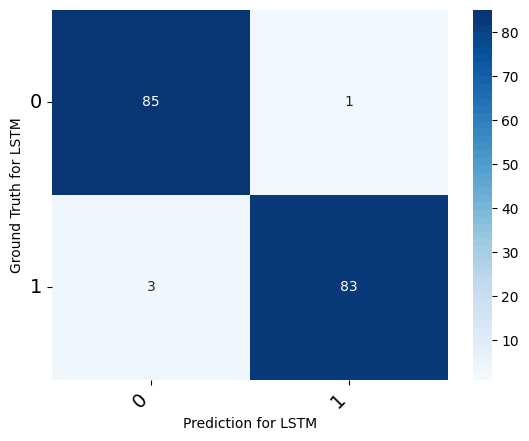

In [ ]:

heatmap = sns.heatmap(data=pd.DataFrame(confusion_matrix(Y_test, Y_pred)), annot=True, fmt="d", cmap=sns.color_palette("Blues", 50))
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize=14)
plt.ylabel('Ground Truth for LSTM')
plt.xlabel('Prediction for LSTM')
plt.show()

In [ ]:
import streamlit as st
from keras.models import load_model
from keras.preprocessing.sequence import pad_sequences
import pickle
import numpy as np

# Load the pre-trained LSTM model and tokenizer
model = load_model('spam_classifier_model.h5')
with open('tokenizer.pickle', 'rb') as handle:
    tokenizer = pickle.load(handle)

# Function to preprocess text and make predictions
def classify_message(message):
    max_len = 150  # Same as during training
    sequence = tokenizer.texts_to_sequences([message])
    padded_sequence = pad_sequences(sequence, maxlen=max_len)
    prediction = model.predict(padded_sequence)
    return prediction

# Streamlit app
st.title('Spam or Ham Classifier')
user_input = st.text_area("Enter the message you'd like to classify:")

if st.button('Classify'):
    prediction = classify_message(user_input)
    if prediction > 0.5:
        st.write("The message is likely to be Spam.")
    else:
        st.write("The message is likely to be Ham.")
    
    # Displaying the prediction confidence
    st.write(f"Confidence: {np.max(prediction) * 100:.2f}%")

FileNotFoundError: [Errno 2] No such file or directory: 'tokenizer.pickle'

In [ ]:
# import sys
# from PyQt5.QtWidgets import QApplication, QWidget, QVBoxLayout, QLabel, QLineEdit, QPushButton

# # Import library untuk membaca model LSTM dan melakukan prediksi
# # Misalnya:
# from tensorflow.keras.models import load_model
# model = load_model('spam_classifier_model.h5')

# class TextClassifierGUI(QWidget):
#     def __init__(self):
#         super().__init__()
#         self.initUI()

#     def initUI(self):
#         self.setWindowTitle('Text Classifier')
#         self.setGeometry(100, 100, 400, 200)

#         layout = QVBoxLayout()

#         self.input_label = QLabel('Masukkan teks yang ingin diuji:')
#         self.input_text = QLineEdit()
#         layout.addWidget(self.input_label)
#         layout.addWidget(self.input_text)

#         self.output_label = QLabel('Hasil Prediksi:')
#         self.output_text = QLabel('')
#         layout.addWidget(self.output_label)
#         layout.addWidget(self.output_text)

#         self.accuracy_label = QLabel('Akurasi:')
#         self.accuracy_text = QLabel('')
#         layout.addWidget(self.accuracy_label)
#         layout.addWidget(self.accuracy_text)

#         self.predict_button = QPushButton('Prediksi')
#         self.predict_button.clicked.connect(self.predict)
#         layout.addWidget(self.predict_button)

#         self.setLayout(layout)
    
#     def predict(self):
#         input_text = self.input_text.text()
        
#         # Lakukan prediksi menggunakan model LSTM
#         # Misalnya:
#         # prediction = model.predict(input_text)
        
#         # Contoh sederhana prediksi
#         prediction = 'spam' if 'promo' in input_text else 'ham'
        
#         accuracy = 0.85  # Contoh nilai akurasi
        
#         self.output_text.setText(prediction)
#         self.accuracy_text.setText(str(accuracy))

# if __name__ == '__main__':
#     app = QApplication(sys.argv)
#     window = TextClassifierGUI()
#     window.show()
#     sys.exit(app.exec_())